<a href="https://colab.research.google.com/github/Apur52027/Machine-learing/blob/main/_ML_Mid_Term_Exam_Question_M.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ML – MIDTERM EXAM (100 Marks)

This notebook is your **single submission file** for the Midterm.

- **Total marks:** 100  
  - Section A: 40 marks  
  - Section B: 60 marks  
- Answer **all questions** in this notebook.  
- Do **not** create a separate PDF.  
- Use clear headings, code, and explanations.

- Run all cells before submitting so all outputs are visible.
- Set the Colab file's shareable link to ‘Anyone with the link’ and ‘View’ access, then submit it in the Phitron Assignment module's Assignment submission section.

In [ ]:
# Common imports for Section B (run once)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree

plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['axes.grid'] = True

---

## SECTION A – Short Application Questions (40 Marks)

Write your answers in the provided **answer cells** in this notebook. Use text, formulas, and short reasoning.

Marks for each question are clearly mentioned.

---

### Q1. Descriptive Statistics and Distributions (15 marks)

A dataset of monthly customer spending (in dollars) is:

`[30, 35, 32, 34, 33, 500, 31, 34, 32, 33]`

1. Compute the **median** and **IQR**. Show your working clearly.  
2. Use the **IQR rule** to check if 500 is an outlier. Show your steps and the fences.  
3. Explain in 3 to 5 sentences why **median + IQR** may be better than **mean + standard deviation** for this dataset.

Write your full answer in the cell below.


#### Q1 Answer (Student)

_Write your calculations and explanation here. You may use Python below if you want, but final reasoning must be readable._

1. Sort the data= [30,31,32,32,33,33,34,34,35,500]
 There are n=10 values (even number), so the median is the average of the 5th and 6th values:
 Median=(33+33)/2=33
 Median=33
2.
      Q1 (25th percentile) = 32  
      Q3 (75th percentile) = 34

      IQR=Q3−Q1=34−32=2
      
      Lower fence=Q1−1.5×IQR=32−1.5(2)=32−3=29

      Upper fence=Q3+1.5×IQR=34+1.5(2)=34+3=37

      Any value outside [29,37] is considered an outlier. 500 > 37 → 500 is an outlier.

3. The dataset has a large outlier (500) that would heavily skew the mean and standard deviation, making them unrepresentative of typical spending.The median represents the middle value and IQR measures spread ignoring extreme values, so they provide a more robust summary of the typical customer spending.This makes median + IQR preferable when outliers are present.

In [ ]:
# Optional helper code for Q1 (not required)
data_q1 = [30, 35, 32, 34, 33, 500, 31, 34, 32, 33]
data_q1

[30, 35, 32, 34, 33, 500, 31, 34, 32, 33]

### Q2. Bayes and Probability in ML (10 marks)

A disease affects **1 percent** of people.  
A test has:  
- Sensitivity: **90 percent**  
- Specificity: **92 percent**  

A random person tests positive.

1. Compute the **positive predictive value (PPV)** using Bayes theorem. Show all steps with probabilities.  
2. If prevalence rises to **20 percent**, explain in 3 to 4 sentences whether PPV increases or decreases and why. You may refer to the Bayes formula in words.

Write your full answer in the cell below.


#### Q2 Answer (Student)

_Write your step by step Bayes calculation and explanation here._
1.
Given
- Disease prevalence:  P(D)=0.01
- Sensitivity (True Positive Rate): P(+|D) =0.9
- Specificity: P(-|¬D)=0.92
- False positive rate P(+|¬D) =1-0.92 =0.08
$$
P(D \mid +) = \frac{P(+ \mid D) \cdot P(D)}{P(+ \mid D) \cdot P(D) + P(+ \mid \neg D) \cdot P(\neg D)}
$$

$$
P(D \mid +) = \frac{0.9 \cdot 0.01}{(0.9 \cdot 0.01) + (0.08 \cdot 0.99)}
$$

$$
P(D \mid +) = \frac{0.009}{0.009 + 0.0792} = \frac{0.009}{0.0882} \approx 0.102
$$
PPV = 10.2%

2. If prevalence rises to  P(D)=0.2, the PPV increases because the numerator P(+∣D)⋅P(D) becomes larger relative to the denominator. With more people actually having the disease, a positive test is more likely to be a true positive. Hence, higher prevalence leads to higher PPV.

### Q3. ML Pipeline Thinking (15 marks)

Columns in a new dataset:

- `age` (numeric)  
- `region` (categorical with 7 levels)  
- `daily_clicks` (numeric)  
- `premium_user` (0 or 1 target)

1. Identify the **type of ML task**. (1 or 2 lines)  
2. List **four preprocessing steps** that would be reasonable for this dataset. (bullet points are fine)  
3. In one short paragraph (6 to 8 sentences), describe the **end to end ML pipeline** you would follow for this problem, from raw data to model evaluation.

Write your full answer in the cell below.


#### Q3 Answer (Student)

_Write your task type, preprocessing list, and pipeline paragraph here._

This is a binary classification problem because the target premium_user has two classes (0 or 1).
Preprocessing steps:
- Handle missing values in age and daily_clicks.

- Encode region (e.g., one-hot encoding).

- Scale numeric features (age, daily_clicks).

- Split data into training and testing sets.(80/20)

# End-to-end ML pipeline:

Explore and clean the raw data, handling missing values and outliers. Encode categorical features and scale numeric features. Split the dataset into training and test sets. Train a classification model like- logistic regression, decision tree .  Evaluate the model on the test set using metrics like accuracy, precision, recall, and F1-score. Finally, analyze feature importance or predictions for insights.

---

## SECTION B – Applied Coding Problems (60 Marks)

Answer **all three questions** in this section.

- Write clean, commented code.  
- After each main step, add a short markdown explanation of what you did and what you observe.  
- Make sure all plots are visible in the notebook.

Marks for each question are clearly mentioned.

---

### Q4. Applied EDA and Preprocessing (20 marks)

We work with the following dataset:

```python
import pandas as pd

df = pd.DataFrame({
    "age": [25, 30, None, 22, 45, 52, None],
    "region": ["north","south","north","east","west","west","south"],
    "purchases": [3, 10, 5, None, 20, 18, 9],
    "premium_user": [0,1,0,0,1,1,0]
})
```

**Tasks (20 marks total):**

1. **Compact EDA using pandas** (6 marks)  
   - Show missing value summary for each column.  
   - Show number of unique values per column.  
   - Show correlation among numeric columns.  
   - Plot:  
     - A histogram of `purchases`.  
     - A bar chart for `region` frequency.

2. **Preprocess the dataset using sklearn plus pandas** (9 marks)  
   - Impute `age` with **median**.  
   - Impute `purchases` with **mean**.  
   - One hot encode `region`.  
   - Scale all numeric columns using **RobustScaler**.

3. **Create one domain driven feature** (3 marks)  
   - Example ideas: `high_spender` based on `purchases`, or `age_group` bins, or an interaction like `age * purchases`.

4. Show the **final transformed dataframe** ready for model training. (2 marks)

Use short explanations in markdown to describe each main block of code.


In [ ]:
# Q4 – Student Answer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Step 1: Create the dataframe
df = pd.DataFrame({
    "age": [25, 30, None, 22, 45, 52, None],
    "region": ["north","south","north","east","west","west","south"],
    "purchases": [3, 10, 5, None, 20, 18, 9],
    "premium_user": [0,1,0,0,1,1,0]
})

df

,age,region,purchases,premium_user
0,25.0,north,3.0,0
1,30.0,south,10.0,1
2,NaN,north,5.0,0
3,22.0,east,NaN,0
4,45.0,west,20.0,1
5,52.0,west,18.0,1
6,NaN,south,9.0,0


_Use additional code cells below for EDA, preprocessing, feature engineering, and final dataframe. Add brief explanations in markdown between code blocks._

# Answer Q4-1

In [ ]:
from pandas.core.arrays import numeric
df.isnull().sum()
df.nunique()
numeric_cols =["age","purchases","premium_user"]
df[numeric_cols].corr()


,age,purchases,premium_user
age,1.000000,0.923677,0.789534
purchases,0.923677,1.000000,0.825860
premium_user,0.789534,0.825860,1.000000


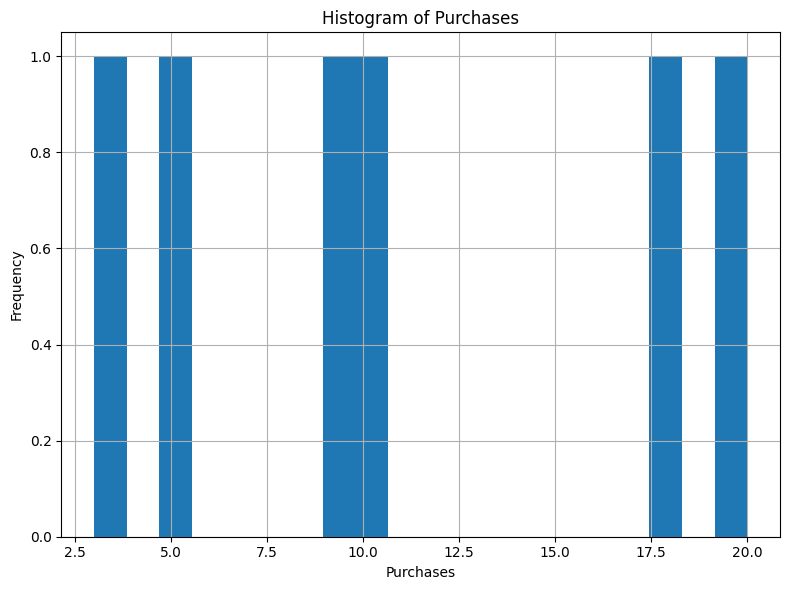

In [ ]:
# Histogram of purchases
df["purchases"].hist(bins=20,figsize=(8,6))
plt.xlabel("Purchases")
plt.ylabel("Frequency")
plt.title("Histogram of Purchases")
plt.tight_layout()
plt.show()

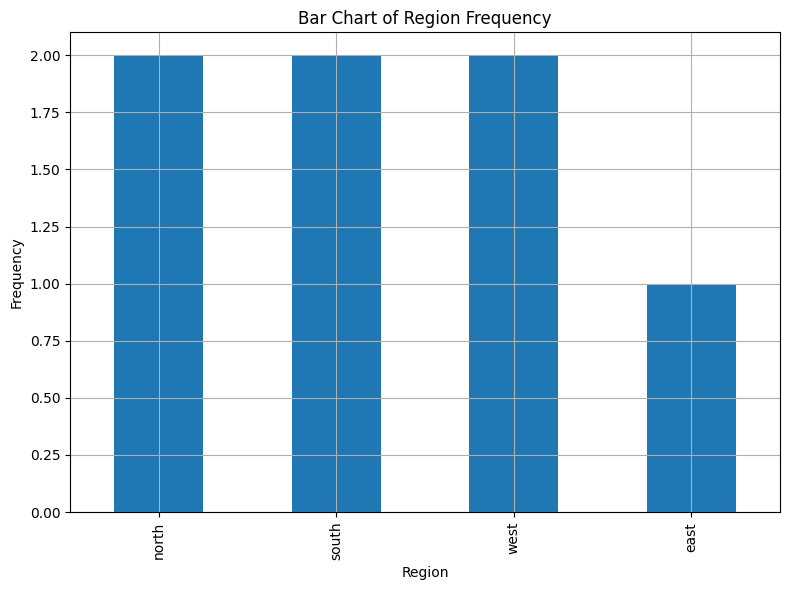

In [ ]:
# Bar chart for region frequency
plt.figure(figsize=(8,6))
df["region"].value_counts().plot(kind ="bar")
plt.xlabel("Region")
plt.ylabel("Frequency")
plt.title("Bar Chart of Region Frequency")
plt.tight_layout()
plt.show()

# Answer Q4-2



In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import RobustScaler

#Impute missing values (age = median, purchases = mean).
df['age'] = df['age'].fillna(df['age'].median())
df['purchases'] = df['purchases'].fillna(df['purchases'].mean())
df

,age,region,purchases,premium_user
0,25.0,north,3.000000,0
1,30.0,south,10.000000,1
2,30.0,north,5.000000,0
3,22.0,east,10.833333,0
4,45.0,west,20.000000,1
5,52.0,west,18.000000,1
6,30.0,south,9.000000,0


In [ ]:
#one hot Encoding into region
df = pd.get_dummies(df,'region', dtype=int)
df


,age,purchases,premium_user,region_east,region_north,region_south,region_west
0,25.0,3.000000,0,0,1,0,0
1,30.0,10.000000,1,0,0,1,0
2,30.0,5.000000,0,0,1,0,0
3,22.0,10.833333,0,1,0,0,0
4,45.0,20.000000,1,0,0,0,1
5,52.0,18.000000,1,0,0,0,1
6,30.0,9.000000,0,0,0,1,0


In [ ]:
# Scale numeric columns using RobustScaler
scaler = RobustScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])
df

,age,purchases,premium_user,region_east,region_north,region_south,region_west
0,-0.5,-0.943820,0.0,0,1,0,0
1,0.0,0.000000,1.0,0,0,1,0
2,0.0,-0.674157,0.0,0,1,0,0
3,-0.8,0.112360,0.0,1,0,0,0
4,1.5,1.348315,1.0,0,0,0,1
5,2.2,1.078652,1.0,0,0,0,1
6,0.0,-0.134831,0.0,0,0,1,0


# Answer Q4-3

In [ ]:

df['age_purchases'] = df['age'] * df['purchases']

# Answer Q4-4

In [ ]:
df

,age,purchases,premium_user,region_east,region_north,region_south,region_west,age_purchases
0,-0.5,-0.943820,0.0,0,1,0,0,0.471910
1,0.0,0.000000,1.0,0,0,1,0,0.000000
2,0.0,-0.674157,0.0,0,1,0,0,-0.000000
3,-0.8,0.112360,0.0,1,0,0,0,-0.089888
4,1.5,1.348315,1.0,0,0,0,1,2.022472
5,2.2,1.078652,1.0,0,0,0,1,2.373034
6,0.0,-0.134831,0.0,0,0,1,0,-0.000000


---

### Q5. Applied Regression and Residual Analysis (20 marks)

We use this dataset:

```python
import pandas as pd

df2 = pd.DataFrame({
    "area_sqft": [800, 1000, 1200, 1500, 1800, 2000],
    "bedrooms": [2,2,3,3,4,4],
    "price": [120, 150, 170, 210, 260, 300]
})
```

**Tasks (20 marks total):**

1. Create the dataframe `df2`. (1 mark)  
2. Split the data into **train and test** with 80 percent train and 20 percent test. (3 marks)  
3. Fit a **LinearRegression** model to predict `price` from `area_sqft` and `bedrooms`. (4 marks)  
4. Print model **intercept**, **coefficients**, and **predictions** on the test set. (4 marks)  
5. Compute the following metrics on the test set. (6 marks)  
   - Mean Absolute Error (MAE)  
   - Root Mean Squared Error (RMSE)  
   - R squared (R²)  
6. Plot a **residual plot** with `y_true − y_pred` on the vertical axis and `y_pred` on the horizontal axis. (2 marks)  
   - Add a short note explaining what you observe from the residuals.

Again, use short markdown explanations to describe each step.


# Q5 – 1

In [ ]:


# Step 1: Create the dataframe
df2 = pd.DataFrame({
    "area_sqft": [800, 1000, 1200, 1500, 1800, 2000],
    "bedrooms": [2,2,3,3,4,4],
    "price": [120, 150, 170, 210, 260, 300]
})

df2

,area_sqft,bedrooms,price
0,800,2,120
1,1000,2,150
2,1200,3,170
3,1500,3,210
4,1800,4,260
5,2000,4,300


_Use additional code cells below for train test split, model training, metrics, and the residual plot. Add a brief comment on the residuals in markdown._

# Q5 – 2

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
target_col ='price'
X = df2.drop(columns=[target_col])
y= df2[target_col]
x_train,x_test,y_train,y_test =train_test_split(X,y,test_size =.20,random_state =42)


# Q5 – 3

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

# Q5 – 4

In [ ]:
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

Intercept: -33.84615384615387
Coefficients: [0.15384615 5.38461538]


In [ ]:
import numpy as np
y_pred =model.predict(x_test)
print("Prediction: ",y_pred)

Prediction:  [100.         130.76923077]


# Q5 – 5

In [ ]:
# Compute MAE, RMSE, R²
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print("MAE:", mae)
print("RMSE:", rmse)
print("R²:", r2)


MAE: 19.615384615384613
RMSE: 19.61915499208746
R²: -0.7107166337935567


# Q5 – 6

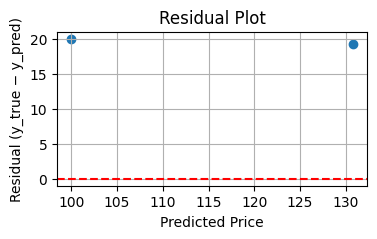

In [ ]:
residuals = y_test - y_pred
plt.figure(figsize=(4,2))
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Price")
plt.ylabel("Residual (y_true − y_pred)")
plt.title("Residual Plot")
plt.show()


---

### Q6. Applied Classification, Metrics, Trees and ROC (20 marks)

We start with:

```python
import numpy as np

y_true = np.array([1,0,1,0,1,0,1,0,1,0])
y_prob = np.array([0.9,0.1,0.85,0.2,0.7,0.4,0.6,0.3,0.95,0.05])
```

**Part 1: Threshold based classification and metrics (8 marks)**

1. With threshold **0.5**, convert probabilities to class predictions. Then compute:  
   - Confusion matrix  
   - Precision  
   - Recall  
   - F1 score

2. With threshold **0.3**, convert probabilities to class predictions again and recompute the same metrics.

3. In 3 to 4 sentences, explain how lowering the threshold from 0.5 to 0.3 changed precision and recall and why this happens.

**Part 2: ROC and AUC (6 marks)**

4. Plot the **ROC curve** using `y_true` and `y_prob`.  
5. Compute the **AUC** and print it with 3 decimal places.  
6. Add a one or two line comment on what a high or low AUC means in this context.

**Part 3: Decision Tree on a small dataset (6 marks)**

Create this dataset:

```python
df3 = pd.DataFrame({
    "hours": [1,2,3,4,5,1,2,3,4,5],
    "passed": [0,0,0,1,1,0,0,1,1,1]
})
```

7. Fit a `DecisionTreeClassifier(max_depth=2)` to predict `passed` from `hours`.  
8. Plot the tree using `plot_tree`.  
9. Write 2 to 3 lines explaining whether the tree looks like it might **overfit** or **generalize well**, given the dataset size and the model depth.


# Answer Q6 (Part 1)

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt

# Q6 – Student Answer

# Part 1: threshold based classification
y_true = np.array([1,0,1,0,1,0,1,0,1,0])
y_prob = np.array([0.9,0.1,0.85,0.2,0.7,0.4,0.6,0.3,0.95,0.05])

# Write your code for threshold 0.5 and 0.3 below


In [ ]:
y_pred_05 =(y_prob>=0.5).astype(int)
cm_05=confusion_matrix(y_true,y_pred_05)
prec_05 =precision_score(y_true,y_pred_05)
rec_05 =recall_score(y_true,y_pred_05)
f1_05 =f1_score(y_true,y_pred_05)
print("Confusion_matrix",cm_05)
print("Precision",prec_05)
print("Recall",rec_05)
print("f1_05",f1_05)


Confusion_matrix [[5 0]
 [0 5]]
Precision 1.0
Recall 1.0
f1_05 1.0


In [ ]:
y_pred_03 =(y_prob>=.3).astype(int)
cm_03=confusion_matrix(y_true,y_pred_03)
prec_03 =precision_score(y_true,y_pred_03)
rec_03 =recall_score(y_true,y_pred_03)
f1_03 =f1_score(y_true,y_pred_03)
print("Confusion_matrix",cm_03)
print("Precision",prec_03)
print("Recall",rec_03)
print("f1_03",f1_03)



Confusion_matrix [[3 2]
 [0 5]]
Precision 0.7142857142857143
Recall 1.0
f1_03 0.8333333333333334


- When the threshold is reduced from 0.5 to 0.3, the model becomes more willing to predict the positive class. This keeps recall at 1.0, since every true positive is still being detected. However, precision falls from 1.0 to 0.714 because the lower threshold causes the model to incorrectly label more negative samples as positive.

# Answer Q6 Part 2

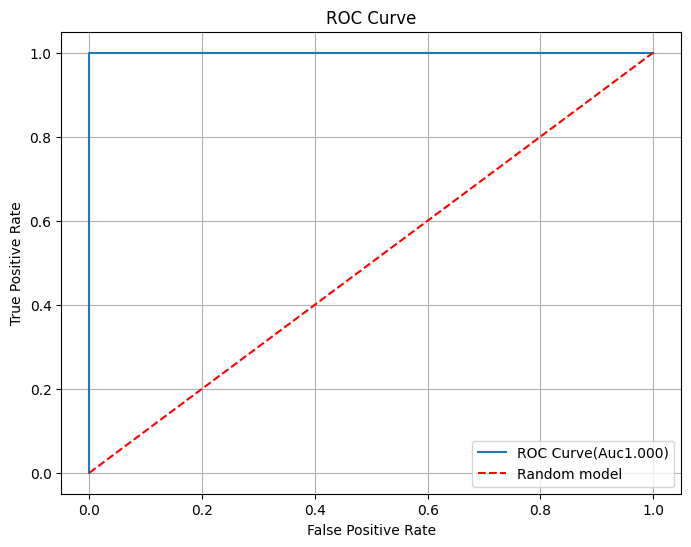

In [ ]:
fpr,tpr,thresholds =roc_curve(y_true,y_prob)
roc_auc =auc(fpr,tpr)
plt.figure(figsize=(8,6))
plt.plot(fpr,tpr,label=f"ROC Curve(Auc{roc_auc:.3f})")
plt.plot([0,1],[0,1],linestyle="--",color="red",label="Random model")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

- AUC near 1.0 means strong separation between classes.
- AUC near 0.5 means the model is no better than random

_Add more code cells for ROC and AUC, and for the decision tree on df3. Write your short explanations in markdown after the relevant outputs._

# Answer Q6(part3)

In [ ]:
df3 = pd.DataFrame({
    "hours": [1,2,3,4,5,1,2,3,4,5],
    "passed": [0,0,0,1,1,0,0,1,1,1]
})

df3

,hours,passed
0,1,0
1,2,0
2,3,0
3,4,1
4,5,1
5,1,0
6,2,0
7,3,1
8,4,1
9,5,1


In [ ]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
model = DecisionTreeClassifier(max_depth=2,random_state=42)
model.fit(df3[['hours']],df3['passed'])

DecisionTreeClassifier(max_depth=2, random_state=42)

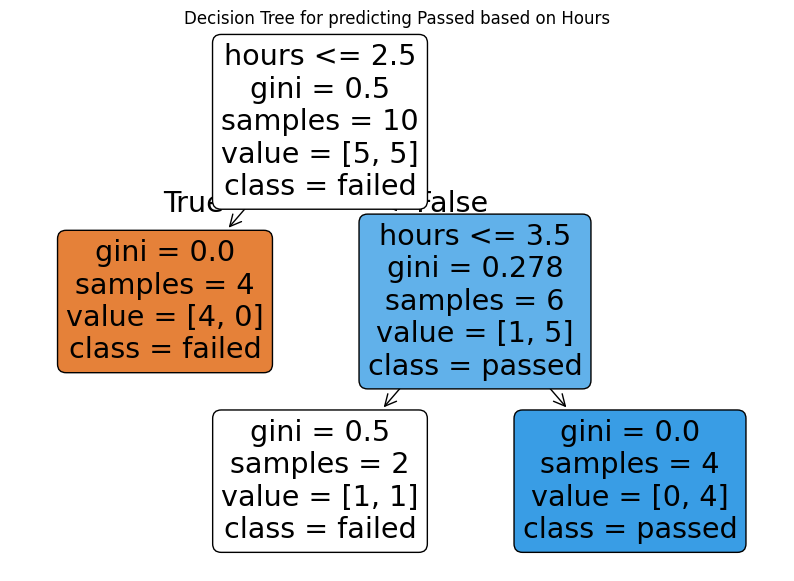

In [ ]:
plt.figure(figsize=(10, 7))
plot_tree(model, feature_names=['hours'], class_names=['failed', 'passed'], filled=True, rounded=True)
plt.title('Decision Tree for predicting Passed based on Hours')
plt.show()

Given the very small dataset (10 samples) and a `max_depth=2`, this decision tree is quite shallow. This simplicity suggests it is unlikely to severely overfit the training data. While it captures a basic pattern (e.g., hours > 2.5 leads to 'passed'), with such limited data, its generalization performance to completely new data might still be uncertain, but the constrained depth helps prevent memorization of the training examples.